<a href="https://colab.research.google.com/github/micsupasun/university_of_essex/blob/main/machine_learning/CE802_P3_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
# manage data
import numpy as np
import pandas as pd

# vitualize data
import matplotlib.pyplot as plt
import seaborn as sns;

# delete outlier
from sklearn.neighbors import LocalOutlierFactor

# processing data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn import model_selection

# model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# metrics
from sklearn import metrics
from sklearn.metrics import r2_score

# skip warning
import warnings
warnings.filterwarnings( action= 'ignore')

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df_data = pd.read_csv("/content/gdrive/MyDrive/essex_university/machine_learning/assignment/CE802_P3_Data.csv")
df_test = pd.read_csv("/content/gdrive/MyDrive/essex_university/machine_learning/assignment/CE802_P3_Test.csv")

In [ ]:
df_data.info()
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   object 
 5   F6      1500 non-null   object 
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   int64  
 12  F13     1500 non-null   int64  
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.85,-258.09,-6.95,2557.29,Low,Europe,7.59,-28.22,-259.22,-1578.12,-141.76,9,6,20.19,169.26,1.64,999.41
1,11.99,-169.71,-16.06,2862.87,Low,Rest,2.57,-13.76,-321.80,-1914.16,-165.83,6,6,9.51,6259.05,0.08,0.00
2,3.48,-317.76,-8.14,2175.81,Medium,UK,1.60,-32.76,-253.54,457.12,-203.87,15,10,7.02,38504.82,6.40,266.29
3,14.75,-394.26,-5.61,1927.86,Low,UK,7.33,-13.42,-149.86,-1972.04,-145.52,6,10,33.99,20883.90,21.98,598.77
4,10.25,-365.46,-10.33,3187.98,High,USA,4.37,-32.66,-224.58,-2022.36,-153.94,12,10,4.29,12095.91,2167.48,396.90


In [ ]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   object 
 5   F6      1500 non-null   object 
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   int64  
 12  F13     1500 non-null   int64  
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  Target  0 non-null      float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.23,-195.54,-1.19,1468.56,Very high,USA,8.97,-23.62,-249.36,-854.18,-155.20,12,10,12.39,-3480.87,0.04,NaN
1,14.89,-426.24,-1.18,3049.08,Very high,USA,6.33,-39.26,-226.26,-2126.68,-159.42,9,8,5.19,8831.19,43.68,NaN
2,6.76,-493.47,-13.55,3197.13,Very low,USA,1.77,-25.84,-238.30,-2270.78,-212.73,12,10,3.30,-4468.44,0.52,NaN
3,15.12,-320.04,-12.17,2436.00,Very low,Rest,5.42,-17.32,-203.64,-304.24,-100.34,18,12,6.51,22851.60,758.54,NaN
4,10.12,-387.99,-7.11,2800.89,Very low,Europe,1.39,-12.78,-265.16,-1419.76,-137.49,0,14,14.22,24396.09,0.68,NaN


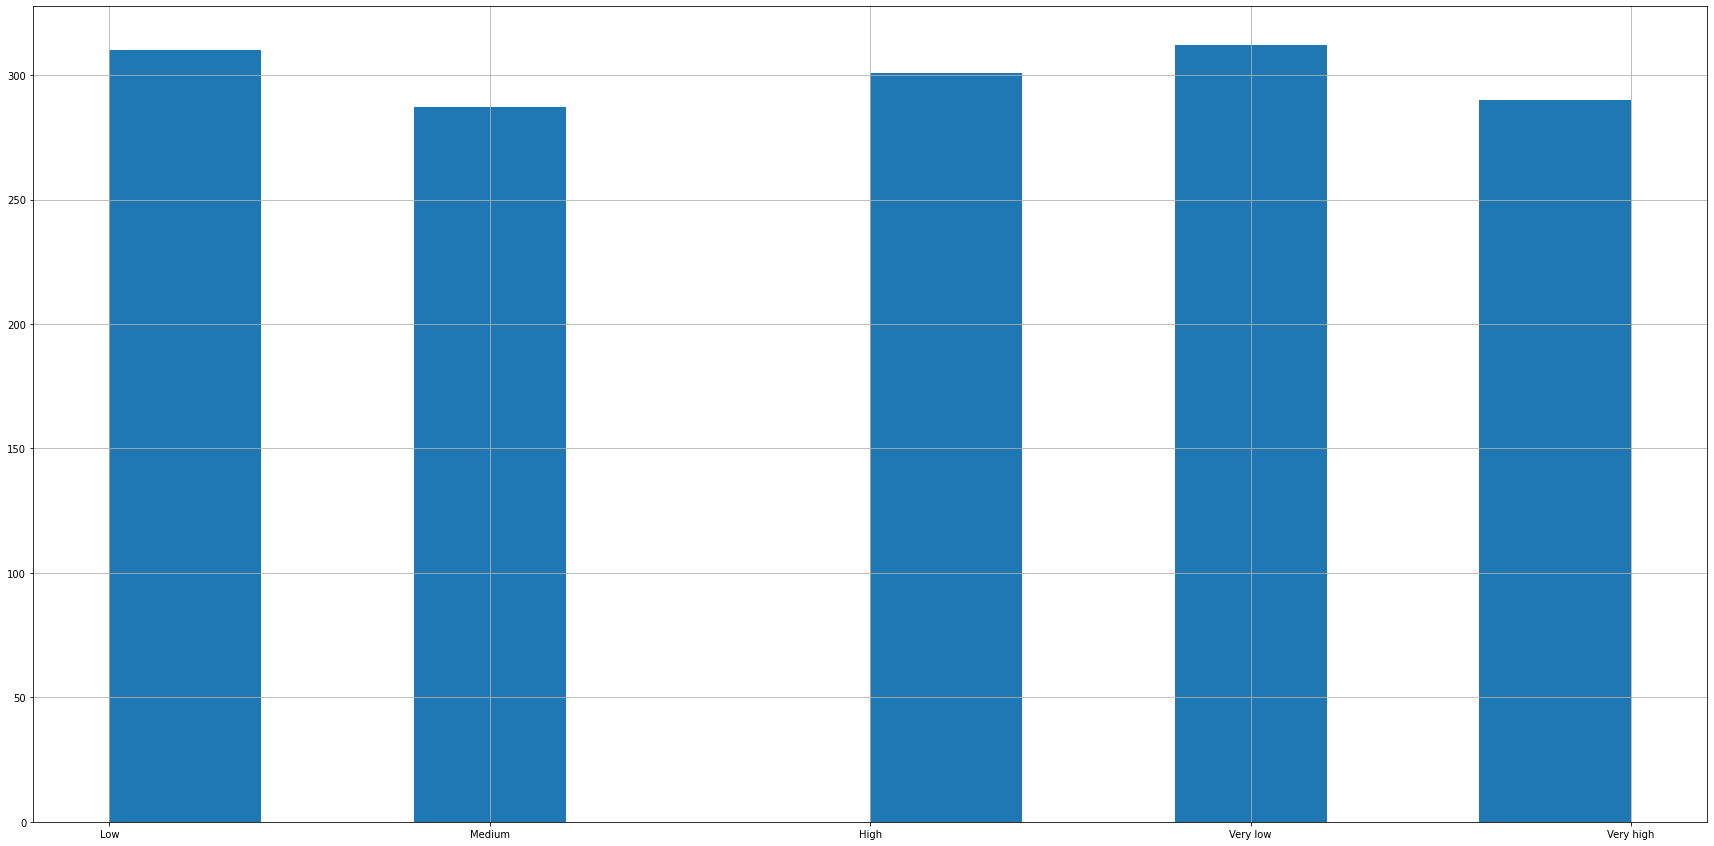

In [ ]:
# vitualization with histogram
df_data['F5'].hist(figsize = (30,15))
plt.show()  

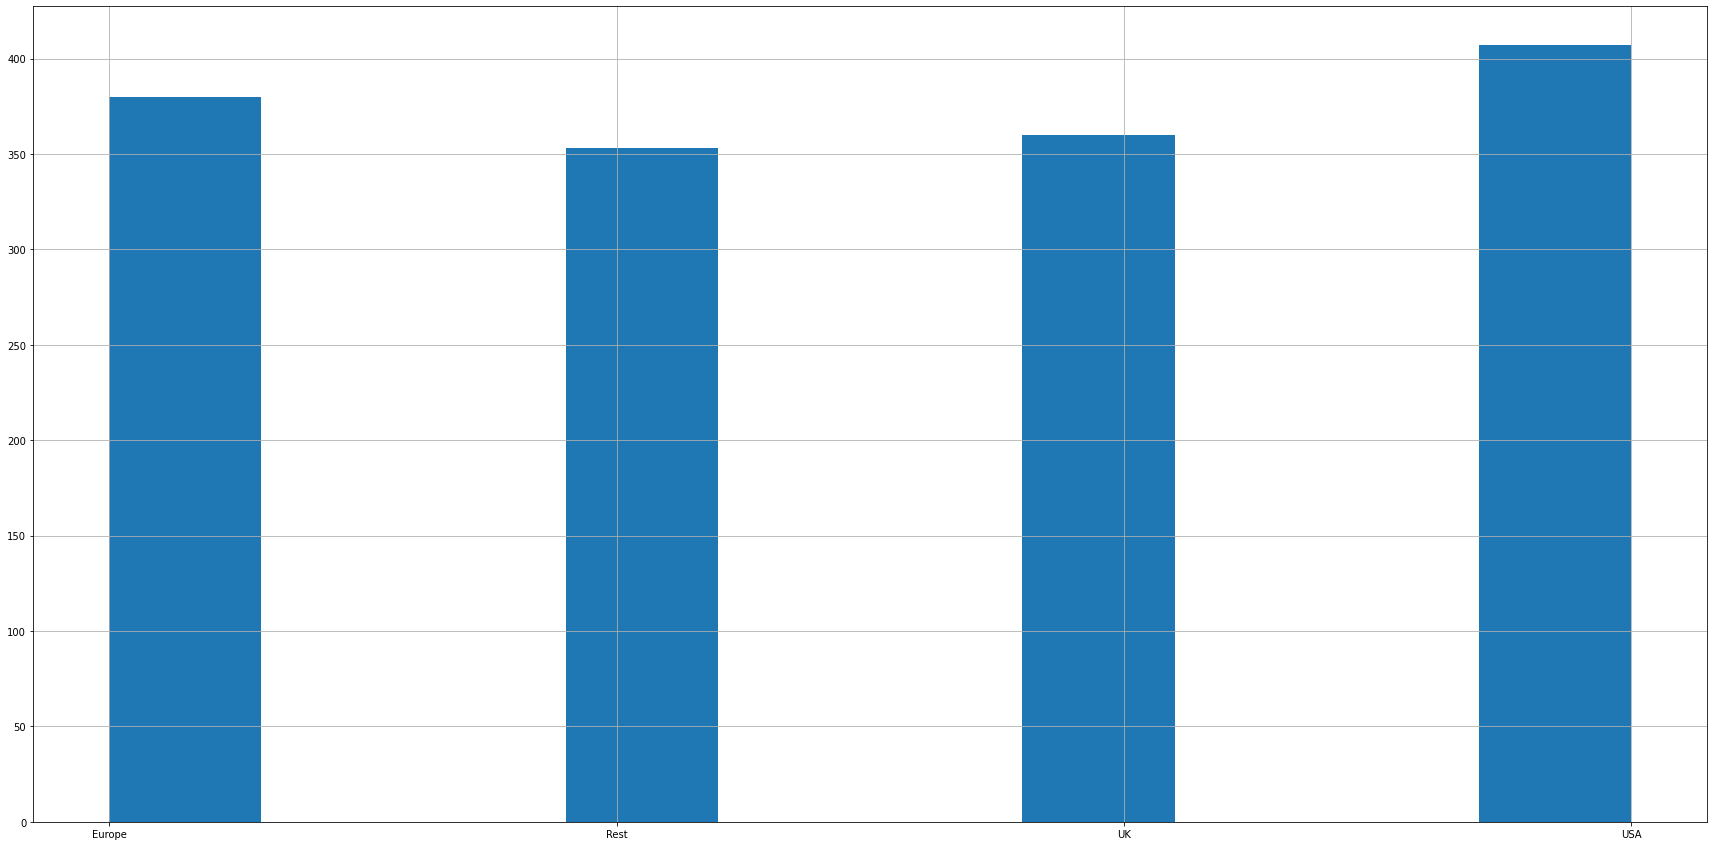

In [ ]:
df_data['F6'].hist(figsize = (30,15))
plt.show()  

# Data Processing

1) Quantitative variable which can be measured such as weight, height ==> column f5 ==> have to inplace value

2) Qualitative variable which can not be measuredเช่น Occupation, gender ==> column f6 ==> use get dummy

In [ ]:
df_data['F5'].unique().tolist(),df_data['F6'].unique().tolist()

(['Low', 'Medium', 'High', 'Very low', 'Very high'],
 ['Europe', 'Rest', 'UK', 'USA'])

In [ ]:
# replace data dataset and test dataset
df_data = df_data.replace({'F5': {'Low': 0, 'Medium': 1, 'High':2, 'Very low':3, 'Very high':4}})
df_data = pd.get_dummies(df_data, columns=['F6'])
df_data

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,F6_Europe,F6_Rest,F6_UK,F6_USA
0,11.85,-258.09,-6.95,2557.29,0,7.59,-28.22,-259.22,-1578.12,-141.76,9,6,20.19,169.26,1.64,999.41,1,0,0,0
1,11.99,-169.71,-16.06,2862.87,0,2.57,-13.76,-321.80,-1914.16,-165.83,6,6,9.51,6259.05,0.08,0.00,0,1,0,0
2,3.48,-317.76,-8.14,2175.81,1,1.60,-32.76,-253.54,457.12,-203.87,15,10,7.02,38504.82,6.40,266.29,0,0,1,0
3,14.75,-394.26,-5.61,1927.86,0,7.33,-13.42,-149.86,-1972.04,-145.52,6,10,33.99,20883.90,21.98,598.77,0,0,1,0
4,10.25,-365.46,-10.33,3187.98,2,4.37,-32.66,-224.58,-2022.36,-153.94,12,10,4.29,12095.91,2167.48,396.90,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,10.76,-334.23,-5.23,2312.88,4,5.76,-30.72,-234.28,-1379.02,-159.49,12,6,19.47,-3117.27,1.66,2369.29,1,0,0,0
1496,13.86,-239.55,-3.43,2701.47,4,3.58,-14.06,-341.86,-961.20,-104.42,18,4,19.23,12181.83,0.14,814.47,0,0,1,0
1497,8.60,-501.84,-4.61,2650.62,3,7.59,-8.64,-253.54,-1545.54,-168.67,12,12,2.73,7133.10,0.28,1692.40,0,0,0,1
1498,5.44,-354.51,-9.24,2808.60,3,4.14,-27.08,-262.86,-809.42,-143.74,18,8,18.36,-34949.13,53.30,635.49,0,0,1,0


In [ ]:
df_test = df_test.replace({'F5': {'Low': 0, 'Medium': 1, 'High':2, 'Very low':3, 'Very high':4}})
df_test = pd.get_dummies(df_test, columns=['F6'])
df_test

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,F6_Europe,F6_Rest,F6_UK,F6_USA
0,11.23,-195.54,-1.19,1468.56,4,8.97,-23.62,-249.36,-854.18,-155.20,12,10,12.39,-3480.87,0.04,NaN,0,0,0,1
1,14.89,-426.24,-1.18,3049.08,4,6.33,-39.26,-226.26,-2126.68,-159.42,9,8,5.19,8831.19,43.68,NaN,0,0,0,1
2,6.76,-493.47,-13.55,3197.13,3,1.77,-25.84,-238.30,-2270.78,-212.73,12,10,3.30,-4468.44,0.52,NaN,0,0,0,1
3,15.12,-320.04,-12.17,2436.00,3,5.42,-17.32,-203.64,-304.24,-100.34,18,12,6.51,22851.60,758.54,NaN,0,1,0,0
4,10.12,-387.99,-7.11,2800.89,3,1.39,-12.78,-265.16,-1419.76,-137.49,0,14,14.22,24396.09,0.68,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.04,-308.37,-12.30,4346.82,2,8.96,-18.28,-266.14,-3132.76,-91.62,9,8,15.63,-1231.92,8.32,NaN,0,0,0,1
1496,14.13,-280.62,-6.00,2600.13,4,2.70,-0.80,-101.86,-1305.60,-147.74,18,18,13.23,7516.71,0.78,NaN,1,0,0,0
1497,13.03,-301.05,-5.22,2279.07,3,0.23,-17.06,-168.30,-1413.06,-102.67,0,14,8.58,9689.01,4.80,NaN,0,1,0,0
1498,3.29,-347.40,-7.19,1985.31,3,2.63,-22.20,-299.66,-1183.62,-118.93,6,8,6.21,-2832.51,0.46,NaN,1,0,0,0


# Exploratory Data Analysis

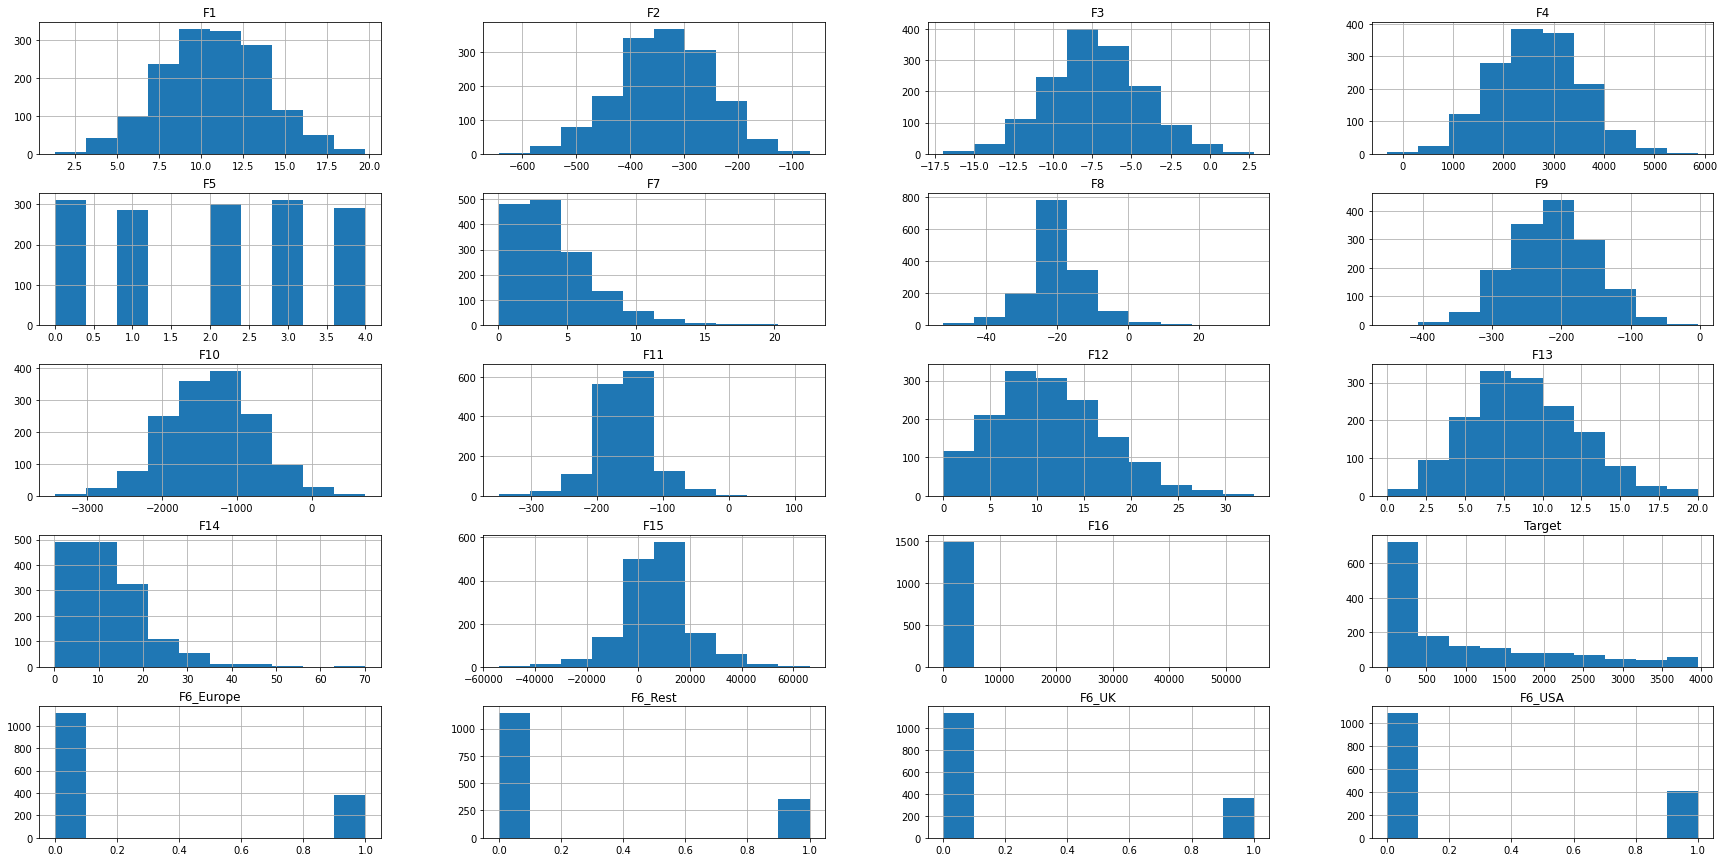

In [ ]:
# analyze the distribution of data and detect abnormal data characteristics.
df_data.hist(figsize = (30,15))
plt.show()    

<function matplotlib.pyplot.show>

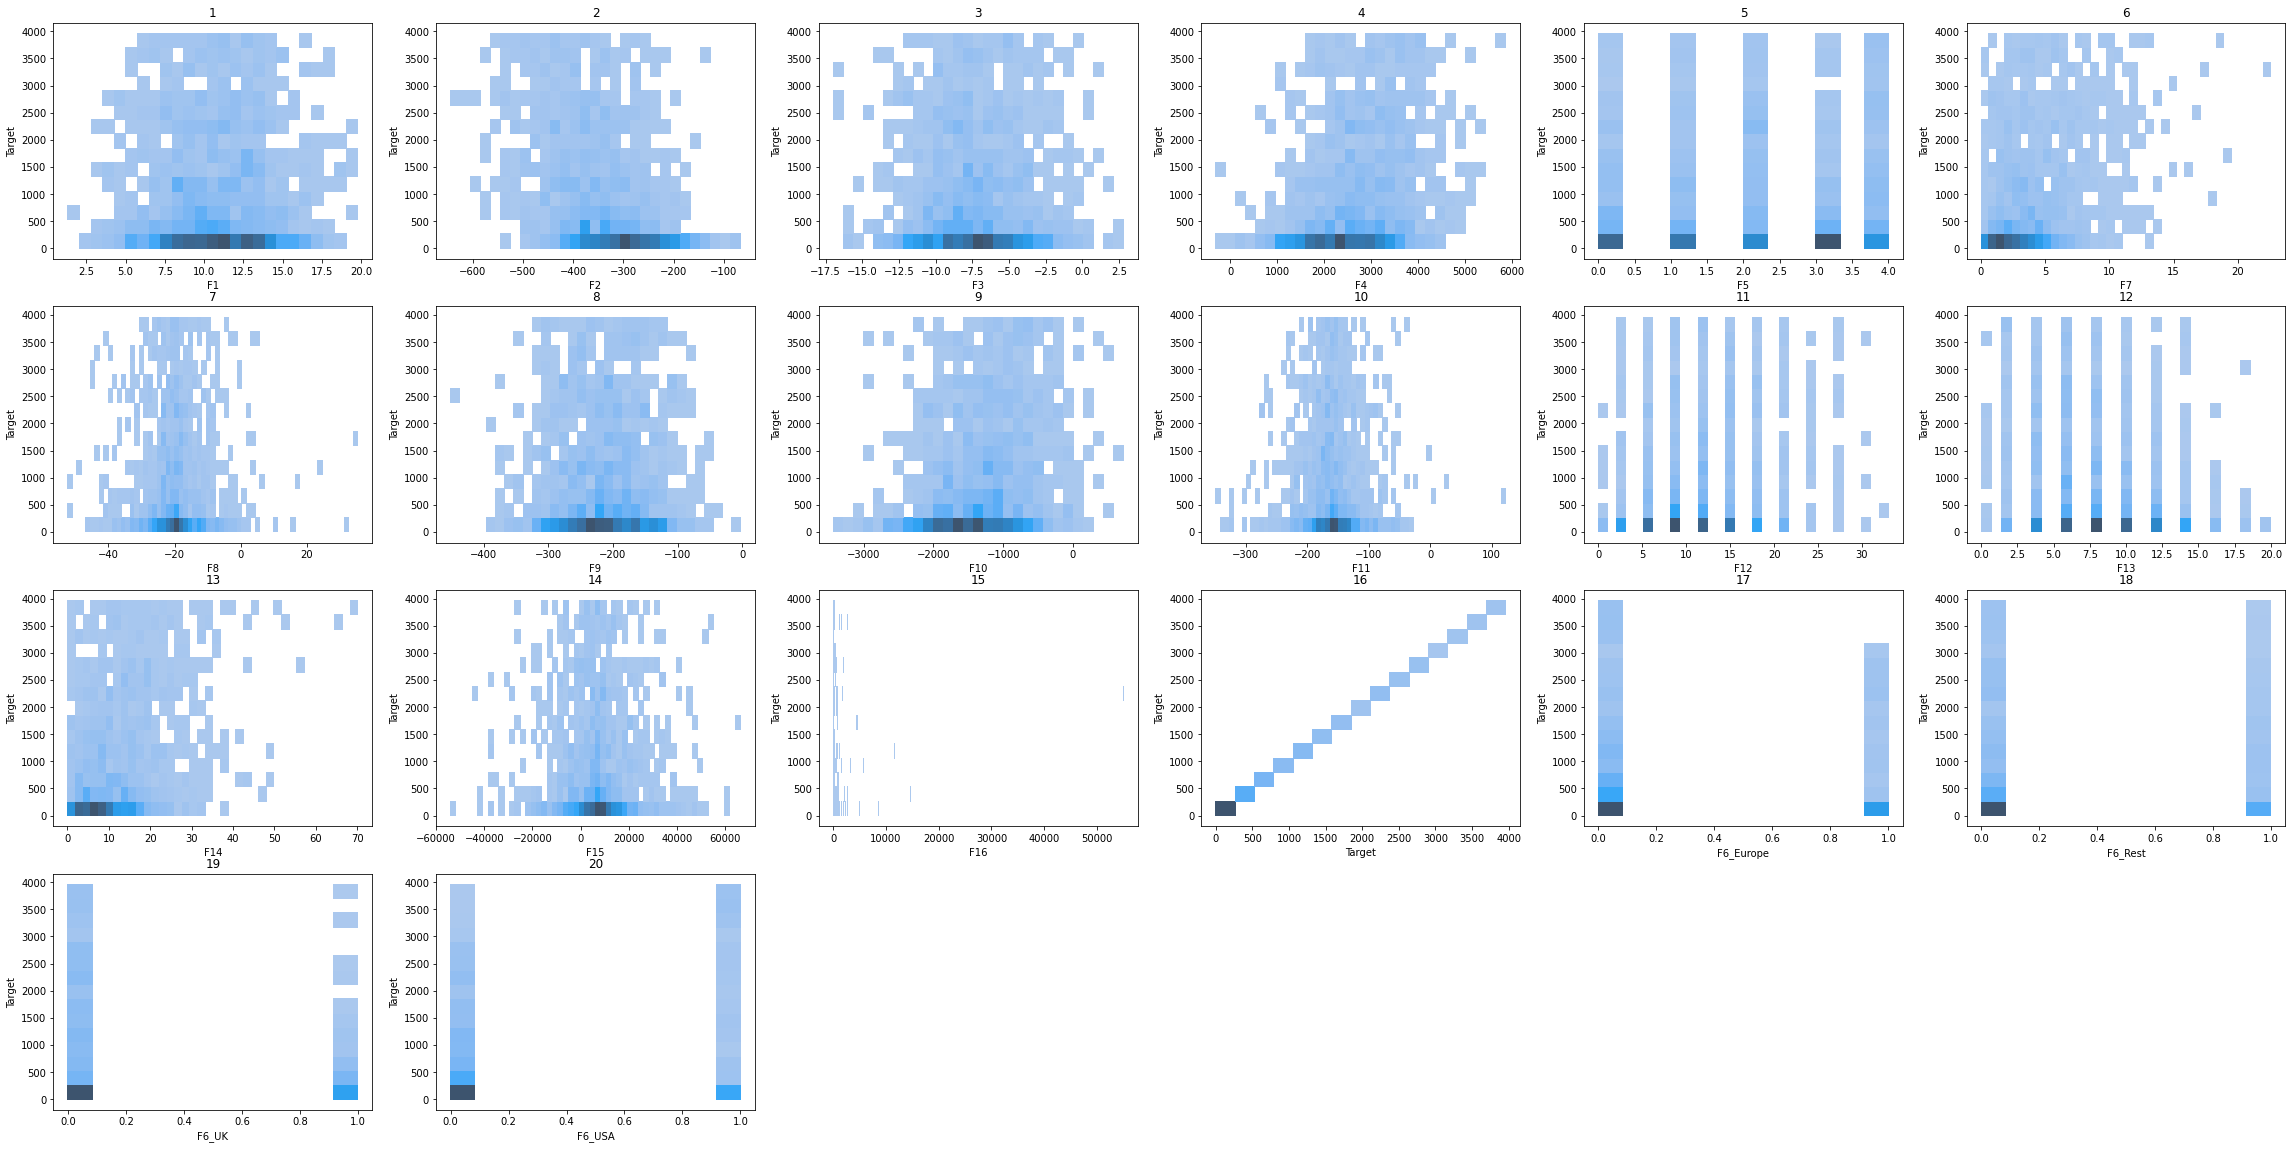

In [ ]:
# compare all feature and label
plt.figure(figsize=(40,20))

for i, column in enumerate(df_data.columns):
  plt.subplot(4,6,i+1)
  sns.histplot(x = df_data[column],y= df_data['Target'])
  plt.title(i+1)
plt.show

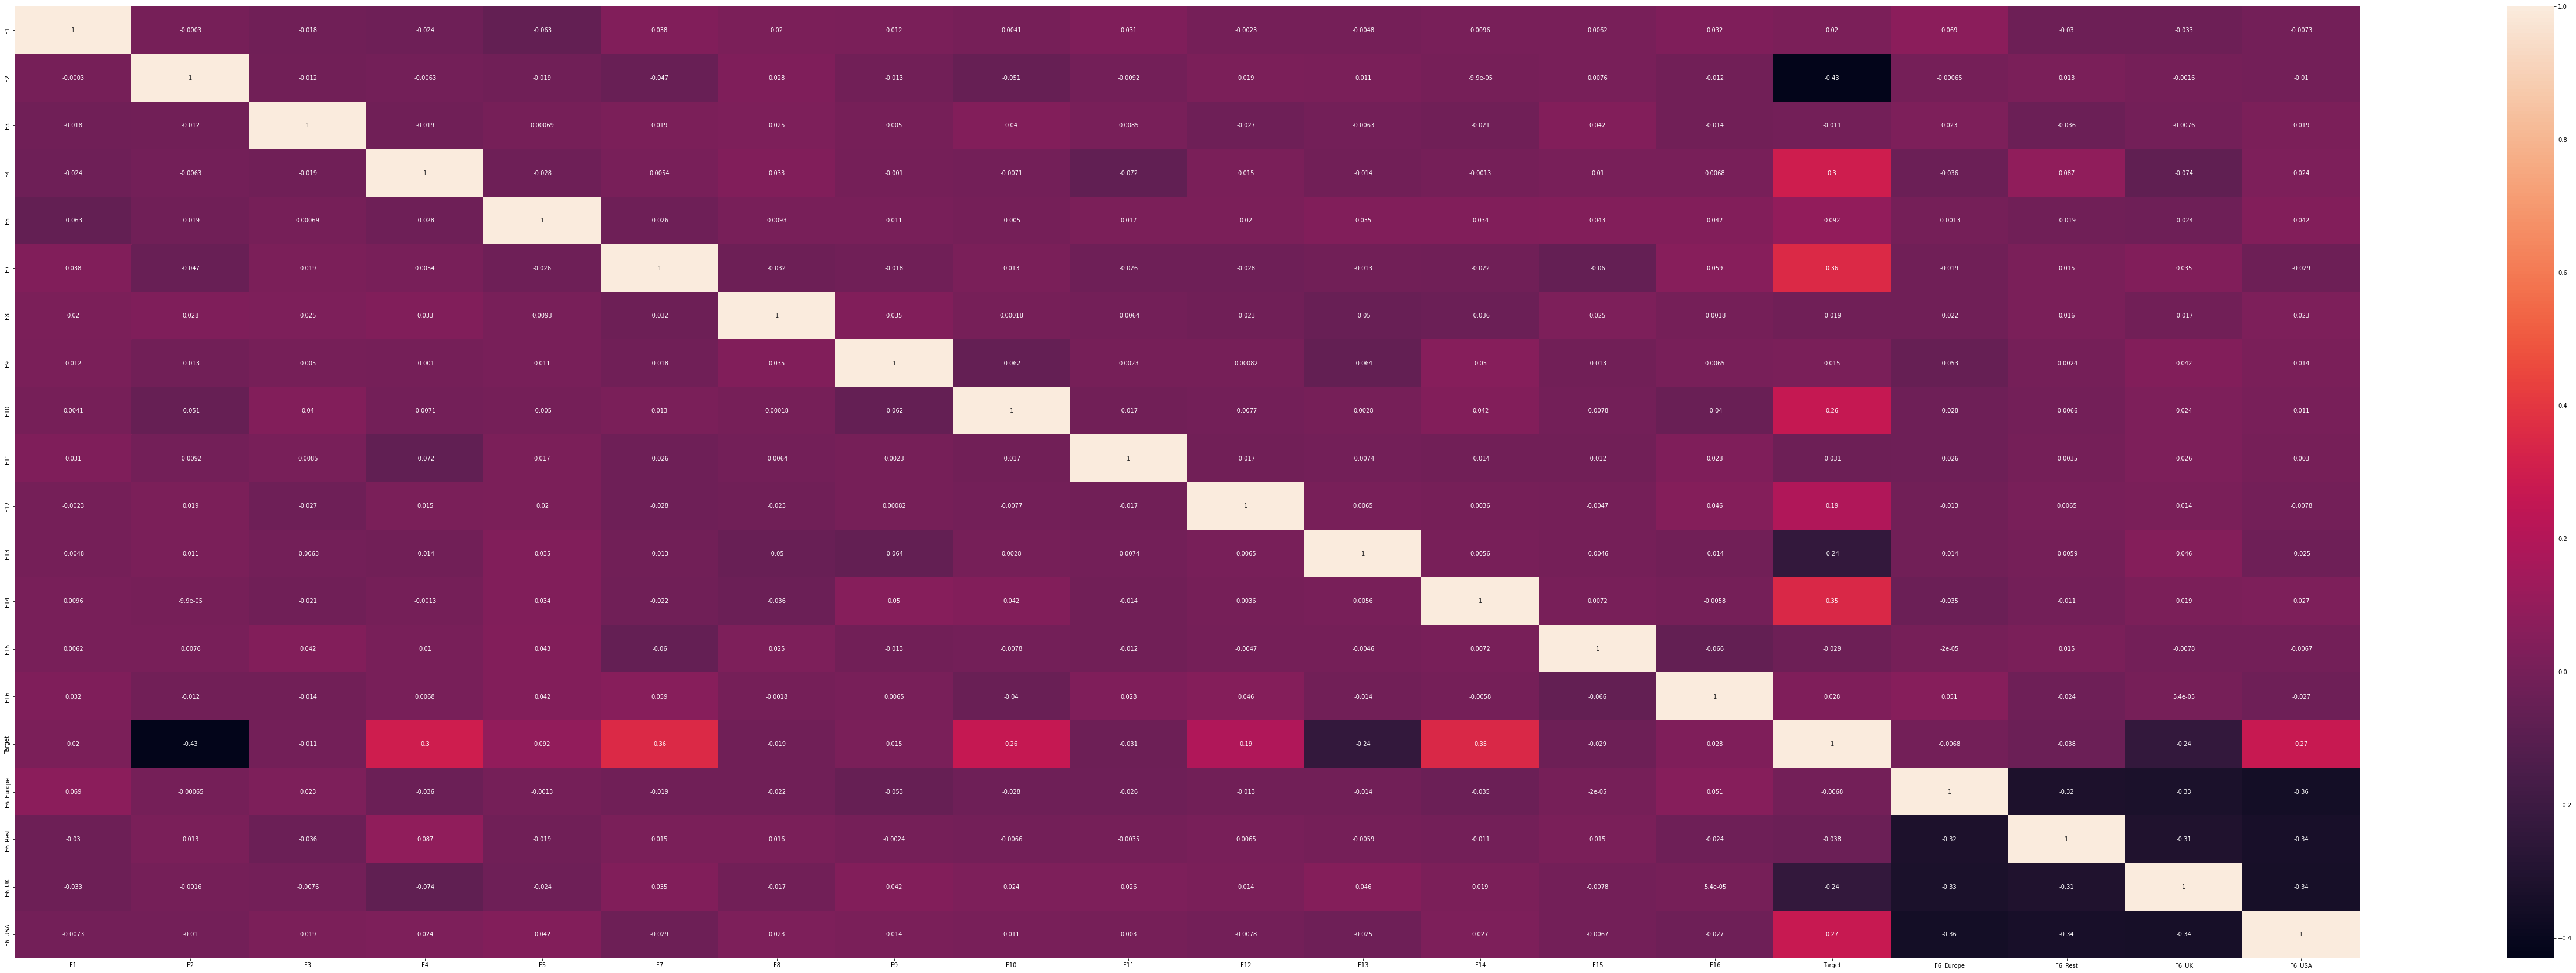

In [ ]:
# trend or correlation information simply by using color pairs, and color intensity represent quantity or frequency, especially data that is near -1 or 1, meaning the two are related.
plt.figure(figsize = (90,30))
data_corr = df_data.corr()
sns.heatmap(data_corr,xticklabels=data_corr.columns,yticklabels=data_corr.columns,annot=True)
# print(plant_corr)

In [ ]:
# show correlation not relate
data_columns = data_corr.columns.tolist()
for i in range(len(data_columns)):
  correlation_columns = data_corr[f'{data_corr.columns[i]}']
  
  for j in range(len(data_columns)):
    correleation_row = correlation_columns[j]
    # if (correleation_row < 1 and correleation_row > 0.8) or (correleation_row > -1 and correleation_row < -0.5):
    if (correleation_row < 0.1 and correleation_row > -0.1):
      print(data_columns[i],data_columns[j],correleation_row)

F1 F2 -0.0003018912370089658
F1 F3 -0.01754640750548516
F1 F4 -0.023762950196325294
F1 F5 -0.0628510392781309
F1 F7 0.037861778815439666
F1 F8 0.020488895460231357
F1 F9 0.012024671464876638
F1 F10 0.004090771420697943
F1 F11 0.031183137809253286
F1 F12 -0.0023103568510808685
F1 F13 -0.0047927570153797755
F1 F14 0.009609189509566837
F1 F15 0.006156668773431976
F1 F16 0.032332059399135256
F1 Target 0.020443176610761896
F1 F6_Europe 0.06882909799247566
F1 F6_Rest -0.029612260149986518
F1 F6_UK -0.03306836329777302
F1 F6_USA -0.00731027270860165
F2 F1 -0.0003018912370089658
F2 F3 -0.012456681705172482
F2 F4 -0.00629501265993846
F2 F5 -0.018975794593425875
F2 F7 -0.04654195539268891
F2 F8 0.027557188200207465
F2 F9 -0.012593634427571368
F2 F10 -0.05124336265297581
F2 F11 -0.009240317219602629
F2 F12 0.018839345268173886
F2 F13 0.01145708229223556
F2 F14 -9.936487916785156e-05
F2 F15 0.007559535789238627
F2 F16 -0.011987067219853351
F2 F6_Europe -0.0006542836518255578
F2 F6_Rest 0.013181723

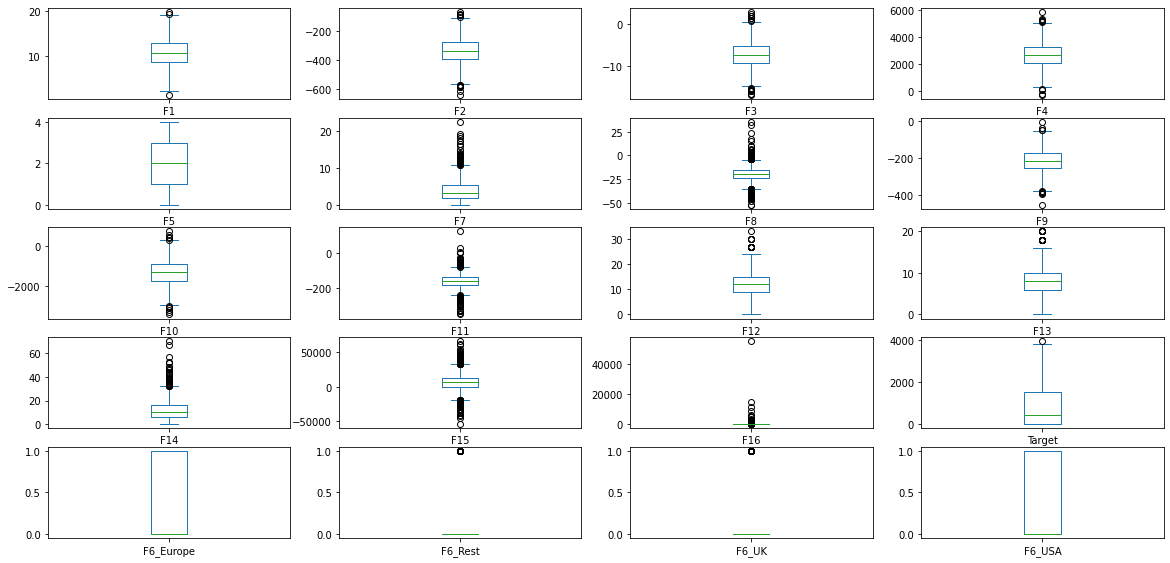

In [ ]:
# show box plot to find outlier columns
df_data.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()

# Feature Engineering

In [ ]:
# delete outlier because in box plot we have outlier in all columns except F5,F6_Europe,F6_USA
OutlierFactor = LocalOutlierFactor()
predict_outlier = OutlierFactor.fit_predict(df_data)
df_data['check_outlier'] = predict_outlier.tolist()
df_data = df_data[df_data['check_outlier'] == 1].reset_index(drop=True).drop(['check_outlier'], axis=1)
df_data

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,F6_Europe,F6_Rest,F6_UK,F6_USA
0,11.85,-258.09,-6.95,2557.29,0,7.59,-28.22,-259.22,-1578.12,-141.76,9,6,20.19,169.26,1.64,999.41,1,0,0,0
1,11.99,-169.71,-16.06,2862.87,0,2.57,-13.76,-321.80,-1914.16,-165.83,6,6,9.51,6259.05,0.08,0.00,0,1,0,0
2,3.48,-317.76,-8.14,2175.81,1,1.60,-32.76,-253.54,457.12,-203.87,15,10,7.02,38504.82,6.40,266.29,0,0,1,0
3,14.75,-394.26,-5.61,1927.86,0,7.33,-13.42,-149.86,-1972.04,-145.52,6,10,33.99,20883.90,21.98,598.77,0,0,1,0
4,13.53,-335.79,-8.29,2206.65,0,5.02,-23.20,-207.38,-631.46,-146.87,6,12,4.47,3531.39,2.36,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,12.60,-360.42,-9.73,3276.12,2,3.50,-29.62,-184.66,81.84,-154.71,15,6,2.07,14727.03,0.00,3376.78,0,0,0,1
1464,10.76,-334.23,-5.23,2312.88,4,5.76,-30.72,-234.28,-1379.02,-159.49,12,6,19.47,-3117.27,1.66,2369.29,1,0,0,0
1465,13.86,-239.55,-3.43,2701.47,4,3.58,-14.06,-341.86,-961.20,-104.42,18,4,19.23,12181.83,0.14,814.47,0,0,1,0
1466,8.60,-501.84,-4.61,2650.62,3,7.59,-8.64,-253.54,-1545.54,-168.67,12,12,2.73,7133.10,0.28,1692.40,0,0,0,1


# Train_test_split

In [ ]:
# train test split to protect data overfitting
features = ['F1','F2','F3','F4','F5','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F6_Europe','F6_Rest','F6_UK','F6_USA']
X = df_data.loc[:, features].to_numpy()
y = df_data.loc[:, 'Target'].to_numpy()
print(X.shape, y.shape)

(1468, 19) (1468,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=300)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1174, 19), (294, 19), (1174,), (294,))

In [ ]:

# Min max is used when we want to scale all the columns between same value like -1,1
# Standard scaler takes mean as 0 and then scale all the data according to  the unit variance.
# Robust will first remove outliers
robust_scaler = preprocessing.RobustScaler()
robust_fit_transform = robust_scaler.fit_transform(X_train)

min_max_scaler = preprocessing.MinMaxScaler()
minmax_fit_transform = min_max_scaler.fit_transform(X_train)

standard_scaler = preprocessing.StandardScaler()
standard_fit_transform = standard_scaler.fit_transform(X_train)


# robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

Text(0.5, 1.0, 'robust_scaler')

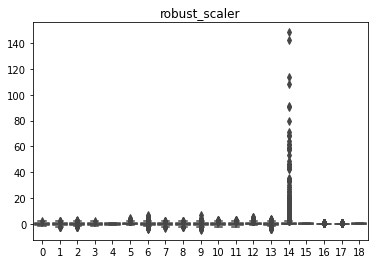

In [ ]:
sns.boxplot(data=robust_fit_transform)
plt.title('robust_scaler')

Text(0.5, 1.0, 'min_max_scaler')

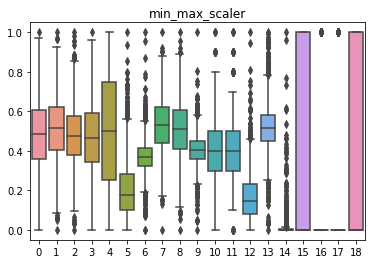

In [ ]:
sns.boxplot(data=minmax_fit_transform)
plt.title('min_max_scaler')

Text(0.5, 1.0, 'standard_fit_transform')

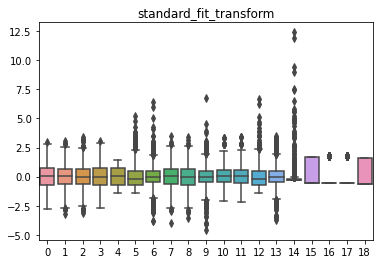

In [ ]:
sns.boxplot(data=standard_fit_transform)
plt.title('standard_fit_transform')

the best scalar is StandardScaler

In [ ]:
standard_scaler = preprocessing.StandardScaler()
X_train_scalar = standard_scaler.fit_transform(X_train)
# y_train_scalar = standard_scaler.fit_transform(y_train)
X_test_scalar = standard_scaler.fit_transform(X_test)
# y_test_scalar = standard_scaler.fit_transform(y_test)
print(X_train_scalar.shape,X_test_scalar.shape)

(1174, 19) (294, 19)


# Train multiple model with default parameter

LinearRegression
Ridge
Lasso
ElasticNet
PLSRegression
DecisionTreeRegressor
RandomForestRegressor
MLPRegressor


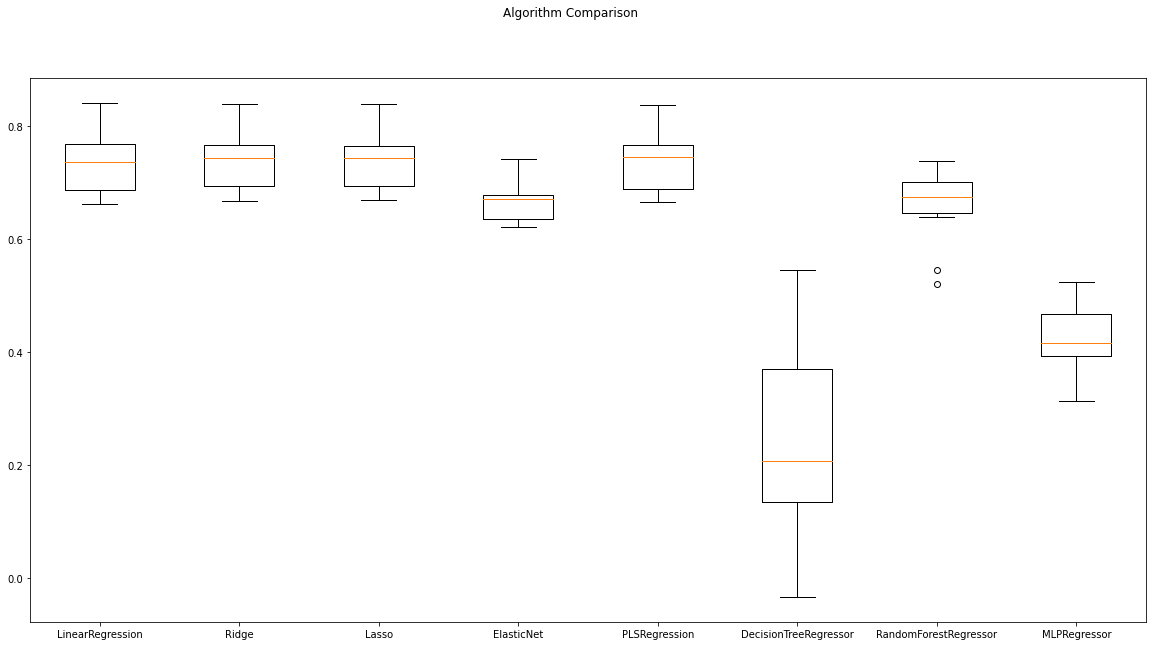

,name_model,mean_score_model,std_score_model,root_mean_square_error,r2_score
0,LinearRegression,0.733770,0.054211,4.024104e+14,-1.279317e+23
1,Ridge,0.736847,0.052695,5.752527e+02,7.385691e-01
2,Lasso,0.737082,0.052407,5.759216e+02,7.379607e-01
3,ElasticNet,0.666077,0.035917,6.815075e+02,6.330720e-01
4,PLSRegression,0.736188,0.052989,5.777947e+02,7.362535e-01
5,DecisionTreeRegressor,0.247757,0.177722,8.877735e+02,3.773501e-01
6,RandomForestRegressor,0.656167,0.067368,6.718541e+02,6.433933e-01
7,MLPRegressor,0.424504,0.057787,9.524244e+02,2.833607e-01


In [ ]:
# add all model classification
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('PLSRegression', PLSRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('MLPRegressor', MLPRegressor()))
all_name_model = []
all_mean_score = []
all_std_score = []
list_rmse = []
list_r2 = []
# evaluate each model in turn
results = []
names = []
# scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  # cross validation
  cv_results = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold)
  model.fit(X_train_scalar, y_train)
  # predict y hat
  y_pred_model =model.predict(X_test_scalar)
  results.append(cv_results)
  names.append(name)
  all_name_model.append(name)
  # cross validation mean score
  all_mean_score.append(cv_results.mean())
  # cross validation std score
  all_std_score.append(cv_results.std())
  # metric with root mean squared error
  list_rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_model)))
  # metric with r-squared
  list_r2.append(r2_score(y_test, y_pred_model))
  print(name)
  plt.show()
# boxplot algorithm comparison
fig = plt.figure(figsize = (20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
# plt.figure(figsize = (90,30))
plt.show()
# dataframe algorithm comparison
df_origin_predict = pd.DataFrame({
    'name_model' : all_name_model,
    'mean_score_model' : all_mean_score,
    'std_score_model' : all_std_score,
    'root_mean_square_error' : list_rmse,
    'r2_score':list_r2
})
display(df_origin_predict)

# Tuning Parameter

In [ ]:
# models.append(('LinearRegression', LinearRegression()))
# models.append(('Ridge', Ridge()))
# models.append(('Lasso', Lasso()))
# models.append(('ElasticNet', ElasticNet()))
# models.append(('PLSRegression', PLSRegression()))
# models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
# models.append(('RandomForestRegressor', RandomForestRegressor()))

# all model and tuning parameter
model_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params' : {
            'copy_X': [True,False],
            'n_jobs': [-1,None,1,3],
            'fit_intercept': [True,False],
            'positive': [True,False]
        }  
    },
    'Ridge': {
        'model': Ridge(),
        'params' : {
            'alpha': [0.5,1,2,4],
            'fit_intercept': [True,False],
            'copy_X': [True,False],
            'max_iter': [True,False],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
            'positive': [True,False]
        }
    },
    'Lasso' : {
        'model': Lasso(),
        'params': {
            'alpha': [0.5,1,2,4],
            'fit_intercept': [True,False],
            'precompute': [True,False],
            'copy_X': [True,False],
            'max_iter': [500,1000,2000,4000],
            'warm_start': [True,False],
            'positive': [True,False],
            'selection': ['cyclic','random']
        }
    },
        'ElasticNet' : {
        'model': ElasticNet(),
        'params': {
            'alpha': [0.5,1,2,4],
            'l1_ratio': [0,0.5,1],
            'fit_intercept': [True,False],
            'precompute': [True,False],
            'max_iter': [500,1000,2000,4000],
            'copy_X': [True,False],
            'warm_start': [True,False],
            'positive': [True,False],
            'selection': ['cyclic','random']
        }
    },
        'PLSRegression' : {
        'model': PLSRegression(),
        'params': {
            'n_components': [1,2,4],
            'scale': [True,False],
            'max_iter': [500,1000,2000,4000],
            'copy': [True,False]
        }
    },
        'DecisionTreeRegressor' : {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
            'splitter': ['best','random'],
            'max_depth': [3,5,None],
            'min_samples_split': [2,5,10],
            'min_samples_leaf': [1,2,4],
            'max_features': ["auto", "sqrt", "log2"],
            # 'min_impurity_decrease': [0,1],
            # 'ccp_alpha': [0,1]
        }
    },
        'RandomForestRegressor' : {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100,400,700,1000],
            'max_features': ["auto", "sqrt"],
            'max_depth' : [3,5,None],
            'min_samples_split' : [2, 5, 10],
            'min_samples_leaf' : [1, 2, 4],
            'bootstrap': [True, False],
        }
    },
        'MLPRegressor' : {
        'model': MLPRegressor(),
        'params': {
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'solver': ['lbfgs', 'sgd', 'adam'],
            'power_t': [0.1,0.5,0.8],
            'max_iter': [200,800,1600],
            'shuffle': [True,False],
            'verbose': [True,False],
            'warm_start': [True,False],
            'nesterovs_momentum': [True,False],
            'early_stopping': [True,False],
            'validation_fraction': [0.1,0.5,0.8]
        }
    },
}


scores = []

for model_name, mp in model_params.items():
  print(mp['model'], mp['params'])
  # use RandomizedSearchCV instead GridSearchCV because it is fast
  random_search = RandomizedSearchCV(
    estimator = mp['model'],
    param_distributions= mp['params'],
    n_iter=100,
    cv=5,
  )
  random_search.fit(X_train_scalar,y_train)
  scores.append({
      'model': model_name,
      'best_score': random_search.best_score_,
      'best_params': random_search.best_params_,
      'best_estimator':random_search.best_estimator_
  })
# show accuracy, best_parameter and best_estimator in each model
df_random_search_cv = pd.DataFrame(scores,columns=['model','best_score','best_params','best_estimator'])
df_random_search_cv



Streaming output truncated to the last 5000 lines.
Iteration 299, loss = 4739.55929669
Iteration 300, loss = 4717.22980578
Iteration 301, loss = 4724.06266565
Iteration 302, loss = 4729.13506734
Iteration 303, loss = 4703.68108684
Iteration 304, loss = 4707.67803293
Iteration 305, loss = 4693.43499926
Iteration 306, loss = 4713.24347210
Iteration 307, loss = 4692.97627055
Iteration 308, loss = 4668.45849761
Iteration 309, loss = 4676.47894699
Iteration 310, loss = 4669.07944704
Iteration 311, loss = 4665.70191851
Iteration 312, loss = 4673.88259697
Iteration 313, loss = 4653.93358184
Iteration 314, loss = 4675.37884294
Iteration 315, loss = 4670.52644219
Iteration 316, loss = 4657.49868225
Iteration 317, loss = 4657.10707948
Iteration 318, loss = 4646.20584702
Iteration 319, loss = 4648.26493667
Iteration 320, loss = 4642.11584487
Iteration 321, loss = 4637.30581691
Iteration 322, loss = 4628.44589268
Iteration 323, loss = 4635.20099354
Iteration 324, loss = 4621.21453646
Iteration 325

,model,best_score,best_params,best_estimator
0,LinearRegression,0.740094,"{'positive': False, 'n_jobs': -1, 'fit_interce...",LinearRegression(n_jobs=-1)
1,Ridge,0.742397,"{'solver': 'cholesky', 'positive': False, 'max...","Ridge(alpha=4, max_iter=False, solver='cholesky')"
2,Lasso,0.743090,"{'warm_start': True, 'selection': 'random', 'p...","Lasso(alpha=4, max_iter=500, precompute=True, ..."
3,ElasticNet,0.743078,"{'warm_start': False, 'selection': 'random', '...","ElasticNet(alpha=4, copy_X=False, l1_ratio=1, ..."
4,PLSRegression,0.742362,"{'scale': True, 'n_components': 4, 'max_iter':...",PLSRegression(n_components=4)
5,DecisionTreeRegressor,0.398233,"{'splitter': 'random', 'min_samples_split': 10...",DecisionTreeRegressor(criterion='friedman_mse'...
6,RandomForestRegressor,0.654654,"{'n_estimators': 700, 'min_samples_split': 5, ...","(DecisionTreeRegressor(max_features='sqrt', mi..."
7,MLPRegressor,0.923699,"{'warm_start': True, 'verbose': True, 'validat...","MLPRegressor(activation='logistic', max_iter=8..."


# Evaluation Multiple Model with Tuning parameter

use dictionary to find best parameter and best score

LinearRegression
Ridge
Lasso
ElasticNet
PLSRegression
DecisionTreeRegressor
RandomForestRegressor
Iteration 1, loss = 821904.74217634
Iteration 2, loss = 334556.88405059
Iteration 3, loss = 149876.83632380
Iteration 4, loss = 73515.61053067
Iteration 5, loss = 54696.49334014
Iteration 6, loss = 40472.40847724
Iteration 7, loss = 33656.37699548
Iteration 8, loss = 30407.36804522
Iteration 9, loss = 27190.78065321
Iteration 10, loss = 25263.70958643
Iteration 11, loss = 23092.78744738
Iteration 12, loss = 21294.92694890
Iteration 13, loss = 19483.93449014
Iteration 14, loss = 18552.34507035
Iteration 15, loss = 17902.80984509
Iteration 16, loss = 16924.81754314
Iteration 17, loss = 16368.66571679
Iteration 18, loss = 15872.04684694
Iteration 19, loss = 15530.85646458
Iteration 20, loss = 14914.26001802
Iteration 21, loss = 14594.43563817
Iteration 22, loss = 14184.05771870
Iteration 23, loss = 14247.72703627
Iteration 24, loss = 14010.47684816
Iteration 25, loss = 13714.00883602
Iteratio

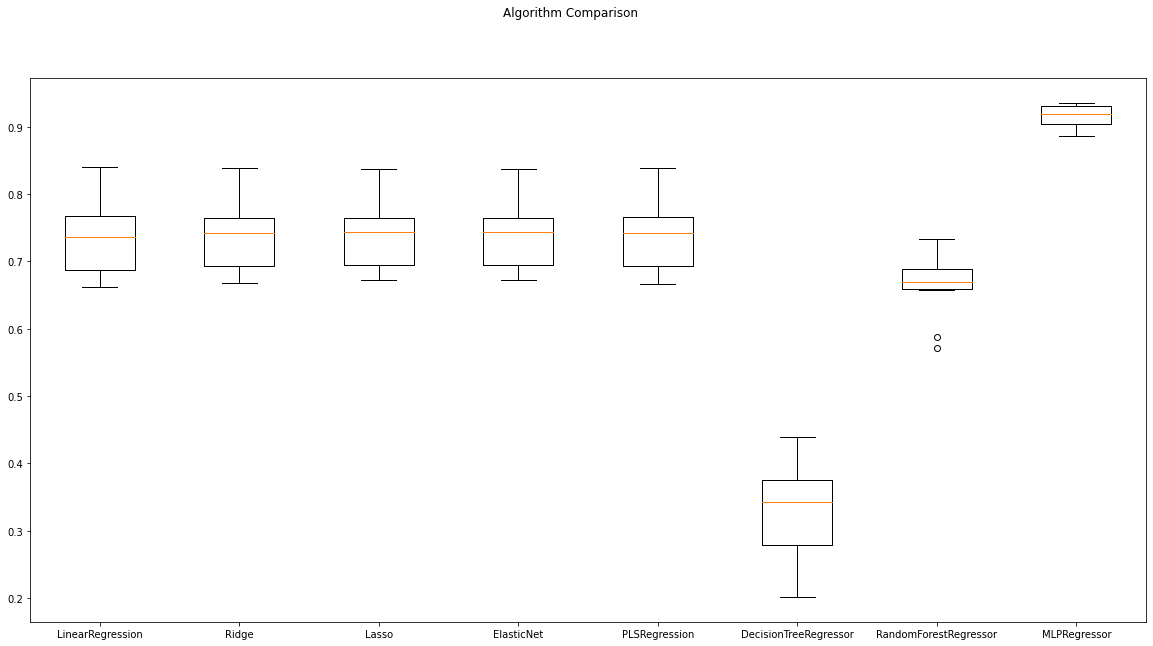

,name_model,mean_score_model,std_score_model,root_mean_square_error,r2_score
0,LinearRegression,0.733770,0.054211,4.024104e+14,-1.279317e+23
1,Ridge,0.736909,0.052443,5.756135e+02,7.382411e-01
2,Lasso,0.737715,0.051311,5.776387e+02,7.363959e-01
3,ElasticNet,0.737717,0.051307,5.768921e+02,7.370769e-01
4,PLSRegression,0.736817,0.052802,5.751054e+02,7.387029e-01
5,DecisionTreeRegressor,0.328891,0.069027,8.046842e+02,4.884471e-01
6,RandomForestRegressor,0.663438,0.047496,6.776767e+02,6.371855e-01
7,MLPRegressor,0.916145,0.016271,3.886276e+02,8.806818e-01


In [ ]:
models = []
# add tuning parameter in all model
models.append(('LinearRegression', LinearRegression(positive = False, n_jobs = -1, fit_intercept = True, copy_X = True)))
models.append(('Ridge', Ridge(solver= 'cholesky', positive= False, max_iter= False, fit_intercept= True, copy_X= True, alpha= 4)))
models.append(('Lasso', Lasso(warm_start= True, selection= 'random', precompute= True, positive= False, max_iter= 500, fit_intercept= True, copy_X= True, alpha= 4)))
models.append(('ElasticNet', ElasticNet(warm_start= False, selection= 'random', precompute =True, positive= False, max_iter= 1000, l1_ratio= 1, fit_intercept= True, copy_X= False, alpha= 4)))
models.append(('PLSRegression', PLSRegression(scale= True, n_components= 4, max_iter= 500, copy= True)))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor(splitter= 'random', min_samples_split= 10, min_samples_leaf= 4, max_features= 'auto', max_depth= None, criterion= 'friedman_mse')))
models.append(('RandomForestRegressor', RandomForestRegressor(n_estimators= 700, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= None, bootstrap= False)))
models.append(('MLPRegressor', MLPRegressor(warm_start= True, verbose= True, validation_fraction= 0.8, solver='sgd', shuffle= True, power_t= 0.8, nesterovs_momentum= False, max_iter= 800, early_stopping= False, activation= 'logistic')))
all_name_model = []
all_mean_score = []
all_std_score = []
list_rmse = []
list_r2 = []
# evaluate each model in turn
results = []
names = []

for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  # cross_validation
  cv_results = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold)
  model.fit(X_train_scalar, y_train)
  # predict y hat value
  y_pred_model =model.predict(X_test_scalar)
  results.append(cv_results)
  names.append(name)
  all_name_model.append(name)
   # mean of cross validation
  all_mean_score.append(cv_results.mean())
   # std of cross validation
  all_std_score.append(cv_results.std())
  # metric root mean squared error
  list_rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_model)))
  # metric r-squared
  list_r2.append(r2_score(y_test, y_pred_model))
  print(name)
  plt.show()
# boxplot algorithm comparison
fig = plt.figure(figsize = (20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
# plt.figure(figsize = (90,30))
plt.show()
# dataframe algorithm comparison
df_origin_predict = pd.DataFrame({
    'name_model' : all_name_model,
    'mean_score_model' : all_mean_score,
    'std_score_model' : all_std_score,
    'root_mean_square_error' : list_rmse,
    'r2_score':list_r2
})
display(df_origin_predict)

# Feature Important

It can be seen that the model has The highest accuracy_score is MLPRegressor

In [ ]:
# the best model is MLPRegressor and we use the best model to perdict output
the_best_model = MLPRegressor(warm_start= True, verbose= True, validation_fraction= 0.8, solver='sgd', shuffle= True, power_t= 0.8, nesterovs_momentum= False, max_iter= 800, early_stopping= False, activation= 'logistic')
the_best_model.fit(X_train_scalar, y_train)
kfold = model_selection.KFold(n_splits=10)
scores = model_selection.cross_val_score(the_best_model, X_train_scalar, y_train, cv=kfold,scoring='r2')
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("root_mean_square_error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred_model)))
print("r2_score:",r2_score(y_test, y_pred_model))

Iteration 1, loss = 828194.80581108
Iteration 2, loss = 334648.02505074
Iteration 3, loss = 147081.06910667
Iteration 4, loss = 77867.61718549
Iteration 5, loss = 49167.02656346
Iteration 6, loss = 39821.89148201
Iteration 7, loss = 32167.12437953
Iteration 8, loss = 26991.11087070
Iteration 9, loss = 24945.24128020
Iteration 10, loss = 22347.81615928
Iteration 11, loss = 20727.32133505
Iteration 12, loss = 19328.51462779
Iteration 13, loss = 18050.90643674
Iteration 14, loss = 17056.59702005
Iteration 15, loss = 16621.56073040
Iteration 16, loss = 16235.20219090
Iteration 17, loss = 15776.19195287
Iteration 18, loss = 15039.30588140
Iteration 19, loss = 14687.57321349
Iteration 20, loss = 14126.51927317
Iteration 21, loss = 13824.01917318
Iteration 22, loss = 13643.53465648
Iteration 23, loss = 13585.14778389
Iteration 24, loss = 13282.11828298
Iteration 25, loss = 12981.48221253
Iteration 26, loss = 12941.09212648
Iteration 27, loss = 12753.16042675
Iteration 28, loss = 12645.2308129

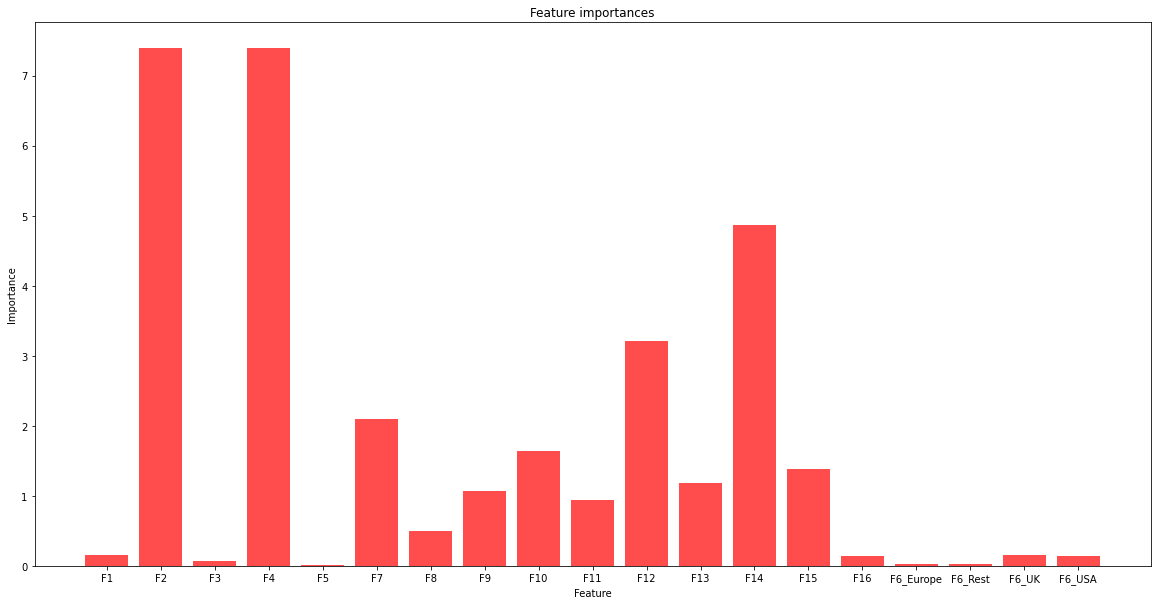

In [ ]:
# virtualization feature importances
def get_feature_importance(j, n):
  y_pred = the_best_model.predict(X_test_scalar)
  s = r2_score(y_test, y_pred) # baseline score
  # s = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(X_test.shape[0]))
    X_test_ = X_test_scalar.copy()
    X_test_[:, j] = X_test[perm, j]
    y_pred_ = the_best_model.predict(X_test_)
    s_ij = r2_score(y_test, y_pred_)
    # s_ij = np.sqrt(metrics.mean_squared_error(y_test, y_pred_))

    total += s_ij
  return s - total / n

# Feature importances
f = []
for j in range(X_test.shape[1]):
  f_j = get_feature_importance(j, 100)
  f.append(f_j)
# Plot
plt.figure(figsize=(20, 10))
plt.bar(features, f, color="r", alpha=0.7)
plt.xticks(ticks=range(X_test.shape[1]))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances")
plt.show()
# https://www.tpa.or.th/writer/read_this_book_topic.php?bookID=3086&read=true#:~:text=%E0%B8%99%E0%B8%B4%E0%B8%A2%E0%B8%B2%E0%B8%A1%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%84%E0%B9%88%E0%B8%B2%20R%2DSquared,%E0%B8%AD%E0%B8%A2%E0%B8%B9%E0%B9%88%E0%B8%A3%E0%B8%B0%E0%B8%AB%E0%B8%A7%E0%B9%88%E0%B8%B2%E0%B8%87%200%25%20%2D%20100%25

# Predict all data in file

In [ ]:
# set all feature to standard scaler in test set and preparing predict
features = ['F1','F2','F3','F4','F5','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F6_Europe','F6_Rest','F6_UK','F6_USA']
X_p3_test = df_test.loc[:, features].to_numpy()

standard_scaler = preprocessing.StandardScaler()
X_p3_test_scalar = standard_scaler.fit_transform(X_p3_test)

In [ ]:
# predict test set data
y_p3_predict = the_best_model.predict(X_p3_test_scalar)
y_p3_predict

array([ 936.09589666, 1610.81282233,  481.94199431, ...,  -40.54382478,
         15.63115256,  569.84171301])

In [ ]:
# predict and add in column Target
df_test['Target'] = y_p3_predict.tolist()
df_test

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,F6_Europe,F6_Rest,F6_UK,F6_USA
0,11.23,-195.54,-1.19,1468.56,4,8.97,-23.62,-249.36,-854.18,-155.20,12,10,12.39,-3480.87,0.04,936.095897,0,0,0,1
1,14.89,-426.24,-1.18,3049.08,4,6.33,-39.26,-226.26,-2126.68,-159.42,9,8,5.19,8831.19,43.68,1610.812822,0,0,0,1
2,6.76,-493.47,-13.55,3197.13,3,1.77,-25.84,-238.30,-2270.78,-212.73,12,10,3.30,-4468.44,0.52,481.941994,0,0,0,1
3,15.12,-320.04,-12.17,2436.00,3,5.42,-17.32,-203.64,-304.24,-100.34,18,12,6.51,22851.60,758.54,855.440616,0,1,0,0
4,10.12,-387.99,-7.11,2800.89,3,1.39,-12.78,-265.16,-1419.76,-137.49,0,14,14.22,24396.09,0.68,-40.543822,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.04,-308.37,-12.30,4346.82,2,8.96,-18.28,-266.14,-3132.76,-91.62,9,8,15.63,-1231.92,8.32,2267.126444,0,0,0,1
1496,14.13,-280.62,-6.00,2600.13,4,2.70,-0.80,-101.86,-1305.60,-147.74,18,18,13.23,7516.71,0.78,50.979168,1,0,0,0
1497,13.03,-301.05,-5.22,2279.07,3,0.23,-17.06,-168.30,-1413.06,-102.67,0,14,8.58,9689.01,4.80,-40.543825,0,1,0,0
1498,3.29,-347.40,-7.19,1985.31,3,2.63,-22.20,-299.66,-1183.62,-118.93,6,8,6.21,-2832.51,0.46,15.631153,1,0,0,0


# Export File

In [ ]:
# export predict data file with google colab
export_file = df_test.to_csv('/content/gdrive/MyDrive/essex_university/machine_learning/assignment/file_prediction/CE802_P3_Test.csv')
export_file